In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic = pd.read_csv('titanic_train.csv')

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

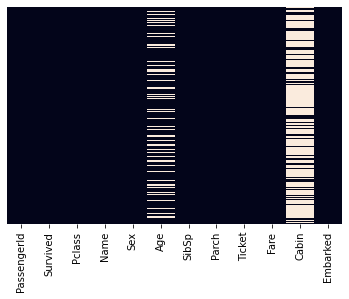

In [6]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

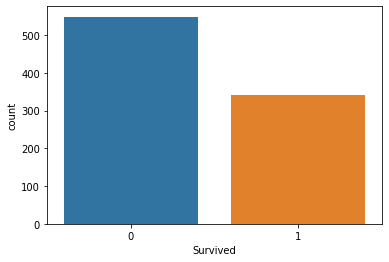

In [7]:
sns.countplot(x = 'Survived', data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

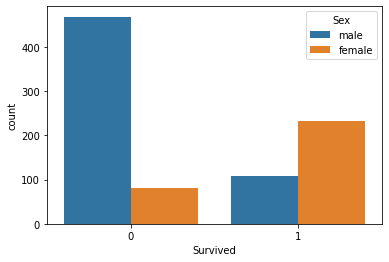

In [8]:
sns.countplot(x = 'Survived', hue='Sex', data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

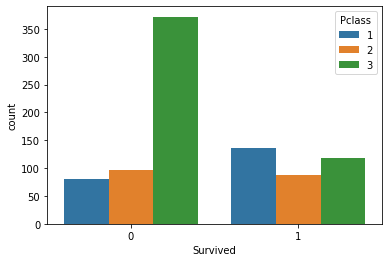

In [10]:
sns.countplot(x='Survived', hue='Pclass', data=titanic)

<AxesSubplot:xlabel='Age'>

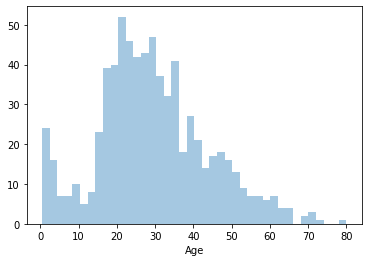

In [14]:
sns.distplot(titanic.Age.dropna(), kde=False, bins=40)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

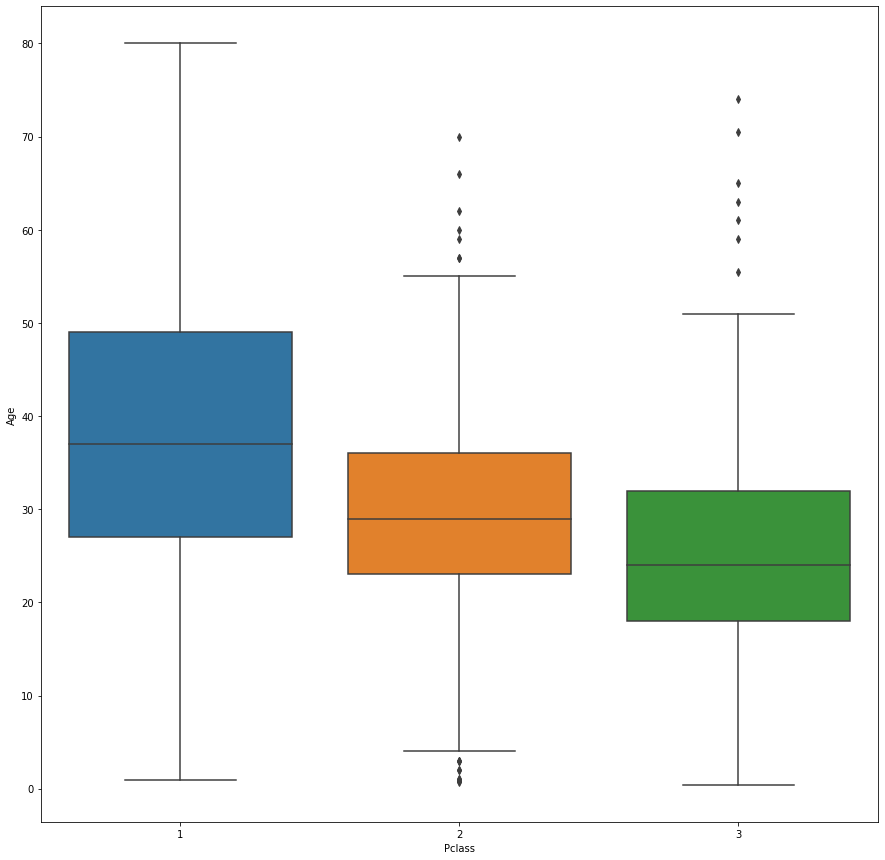

In [20]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Pclass', y='Age', data=titanic)

In [21]:
def impute_age(data):
    Age = data[0]
    Pclass = data[1]
    
    if(pd.isnull(Age)):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [25]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

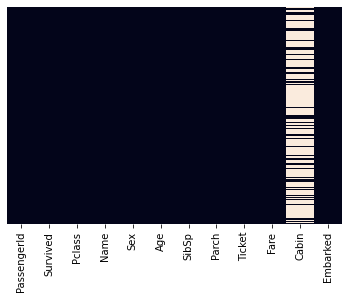

In [26]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False)

In [28]:
titanic.drop('Cabin', axis=1, inplace=True)